In [1]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [2]:
# 로컬 환경에서는 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
# 클라우드 환경에서는 무시해도 좋습니다
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

# 입력 이미지 경로를 지정해 주세요.
# (예시) path = os.getenv('HOME')+'/aiffel/ocr_python/test_image.png'
path = os.getenv('HOME')+'/aiffel/ocr_python/test_image.png' # [[YOUR IMAGE FILE PATH]]   

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
detect_text(path)

total 357996
-rw-r--r-- 1 root root     41523 Jan 19 04:42  10101.csv
-rw-r--r-- 1 root root    325485 Jan 11 01:54  1212.png
-rw-r--r-- 1 root root    213534 Jan 19 07:39  1st_week.ipynb
-rw-r--r-- 1 root root    418959 Jan 19 10:03  2nd_wee333.ipynb
-rw-r--r-- 1 root root    277860 Jan 19 09:21  2nd_week.ipynb
-rw-r--r-- 1 root root   1097545 Feb  9 07:50  4th_week.ipynb
-rw-r--r-- 1 root root    648663 Feb 23 09:09  5th_week.ipynb
-rw-r--r-- 1 root root     15165 Jan  5 02:17  74.jpg
drwxr-xr-x 6 root root      4096 Feb 10 08:06  8787
drwxr-xr-x 2 root root      4096 Feb 14 02:28  activation
drwxr-xr-x 4 root root      4096 Feb 17 02:56  bert_qna
drwxr-xr-x 3 root root      4096 Jan 17 05:09  bike_regression
-rw-r--r-- 1 root root    323856 Feb 16 08:08  bike_sharing_demand_test.csv
-rw-r--r-- 1 root root    648353 Feb 16 08:07  bike_sharing_demand_train.csv
drwxr-xr-x 4 root root      4096 Jan 11 01:14  camera_sticker
drwxr-xr-x 5 root root      4096 Jan 12 02:07  cat_vs_dog
-rw-r-

In [56]:
data_path = os.getenv('HOME')+ '/aiffel/ocr_python/english'
data_path

'/aiffel/aiffel/ocr_python/english'

In [59]:
import os
import matplotlib.pyplot as plt
import cv2
import io
from PIL import Image

from google.cloud import vision
import keras_ocr
import pytesseract
from pytesseract import Output

/aiffel/aiffel/ocr_python/english
/


error: OpenCV(4.5.3) /tmp/pip-req-build-agffqapq/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


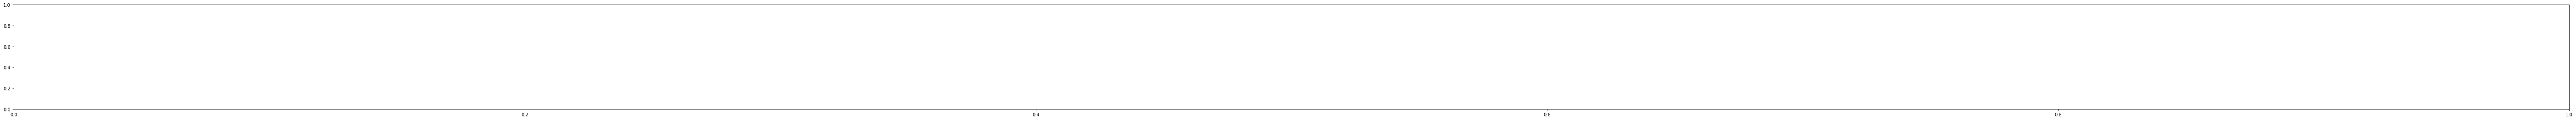

In [70]:
# 입력 이미지 경로 

print(data_path)
file_list = os.listdir(data_path)
file_path = [data_path+'/'+name for name in file_list]
file_path = sorted(file_path)

rows = 20
cols = 1
fig = plt.figure(figsize=(100,100))
for idx, path in enumerate(data_path,1):
    ax = fig.add_subplot(rows, cols, idx)
    print(path)
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

In [3]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


# 여러 데이터 (이미지)를 모아 봅시다 

In [10]:
img_dir = os.getenv('HOME')+'/aiffel/ocr_python/english'
english = os.listdir(img_dir)
english

['test_image.png',
 'KakaoTalk_Image_2022-02-25-10-54-30.jpeg',
 'KakaoTalk_Image_2022-02-25-10-56-50.jpeg',
 'KakaoTalk_Image_2022-02-25-10-54-14.jpeg',
 'dd.png',
 'KakaoTalk_Image_2022-02-25-10-57-03.jpeg',
 'KakaoTalk_Image_2022-02-25-10-53-58.jpeg',
 'KakaoTalk_Image_2022-02-25-10-56-58.jpeg',
 'KakaoTalk_Image_2022-02-25-10-54-20.jpeg']

In [13]:
# # 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
# image_urls = [
#   'https://source.unsplash.com/M7mu6jXlcns/640x460',
#   'https://source.unsplash.com/6jsp4iHc8hI/640x460',
#   'https://source.unsplash.com/98uYQ-KupiE',
#   'https://source.unsplash.com/j9JoYpaJH3A',
#   'https://source.unsplash.com/eBkEJ9cH5b4'
# ]

images = [keras_ocr.tools.read(os.path.join(img_dir, english)) for english in english]
prediction_groups = [pipeline.recognize([os.path.join(img_dir, english)]) for english in english]

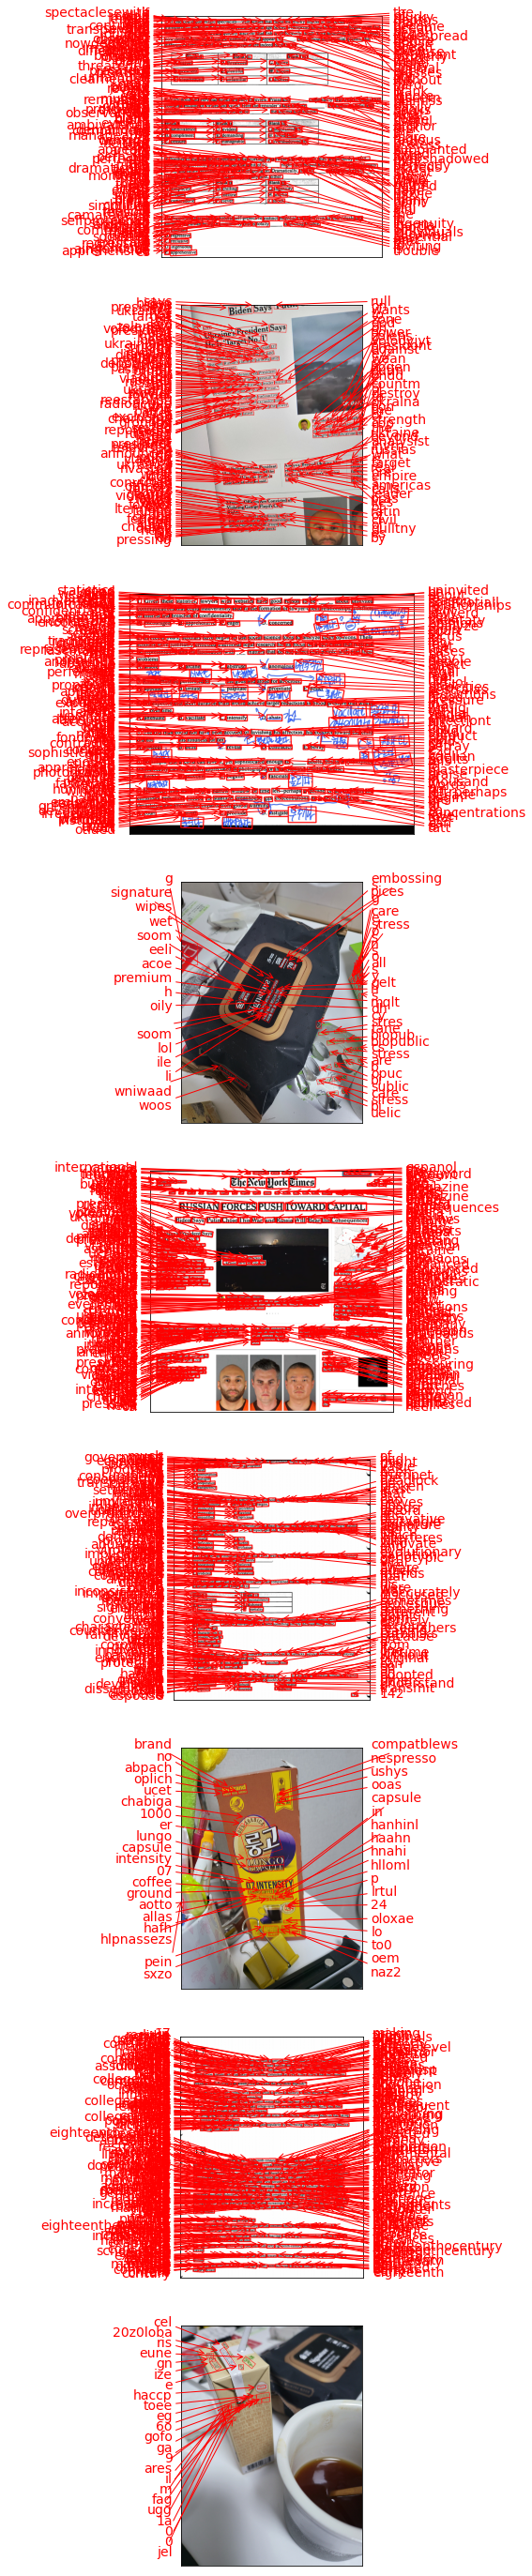

In [61]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(50, 50))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

# 2. tesseract OCR

In [37]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/test_image.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
/aiffel/aiffel/ocr_python/0002.png
/aiffel/aiffel/ocr_python/0003.png
/aiffel/aiffel/ocr_python/0004.png
/aiffel/aiffel/ocr_python/0005.png
/aiffel/aiffel/ocr_python/0006.png
/aiffel/aiffel/ocr_python/0007.png
/aiffel/aiffel/ocr_python/0008.png
/aiffel/aiffel/ocr_python/0009.png
/aiffel/aiffel/ocr_python/0010.png
/aiffel/aiffel/ocr_python/0011.png
/aiffel/aiffel/ocr_python/0012.png
/aiffel/aiffel/ocr_python/0013.png
/aiffel/aiffel/ocr_python/0014.png
/aiffel/aiffel/ocr_python/0015.png
/aiffel/aiffel/ocr_python/0016.png
/aiffel/aiffel/ocr_python/0017.png
/aiffel/aiffel/ocr_python/0018.png
/aiffel/aiffel/ocr_python/0019.png
/aiffel/aiffel/ocr_python/0020.png
/aiffel/aiffel/ocr_python/0021.png
/aiffel/aiffel/ocr_python/0022.png
/aiffel/aiffel/ocr_python/0023.png
/aiffel/aiffel/ocr_python/0024.png
/aiffel/aiffel/ocr_python/0025.png
/aiffel/aiffel/ocr_python/0026.png
/aiffel/aiffel/ocr_python/0027.png
/aiffel/aiffel/ocr_p

In [38]:
def recognize_images(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")

            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1

    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

In [40]:
save_dir = os.getenv('HOME')+'/aiffel/ocr_python/english/'

for english in english:
    print(f'[{english}]')
    try:
        recognize_images(os.path.join(img_dir, english), save_dir)
    except:
        print(f'Cannot recognize characters from {english}')

[K]
Cannot recognize characters from K


# 3. 구글 OCR

In [19]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [26]:
# 로컬 환경에서는 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
# 클라우드 환경에서는 무시해도 좋습니다
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'


# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
for english in english:
    print(f'[{english}]')
    detect_text(os.path.join(img_dir, english))
    print()

-rw-r--r-- 1 root root 2322 Feb 25 01:24 /aiffel/aiffel/ocr_python/my_google_api_key.json
[K]


FileNotFoundError: [Errno 2] No such file or directory: '/aiffel/aiffel/ocr_python/english/K'

# Step3. 테스트 결과 정리

In [49]:
import cv2
data_path = os.getenv('HOME')+ '/aiffel/ocr_python/english'

file_list = os.listdir(data_path)
file_path = [data_path+'/'+name for name in file_list]
file_path = sorted(file_path)


In [55]:
recognize_images(tesseract_result_path, lang='eng')

TypeError: recognize_images() got an unexpected keyword argument 'lang'

In [54]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/tesseract'
    
    
tesseract_result_path = []
for path in file_path:
    cropped_image_path_list = crop_word_regions(path, work_dir)
    tesseract_result_path.extend(cropped_image_path_list)

IsADirectoryError: [Errno 21] Is a directory: '/aiffel/aiffel/ocr_python/english/.ipynb_checkpoints'

In [30]:
def compare_ocr(english):
    print('[keras-ocr]')
    idx = english.index(english)
    keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0])
    plt.show()
    print('[Google OCR]')
    detect_text(os.path.join(img_dir, english))
    print('[Tesseract]')
    recognize_images(os.path.join(img_dir, english), save_dir)

In [45]:
def ocr_model_comparison(img_idx):
    print('Original image:')
    img = cv2.imread(file_path[img_idx], cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.imshow(img)
    plt.show()
    
    print('Google OCR API result:\n')
    detect_text(file_path[img_idx])

    print('Tesseract result:\n')
    work_dir = os.getenv('HOME')+'/aiffel/ocr_python/tesseract/'+str(img_idx)
    cropped_image_path = crop_word_regions(file_path[img_idx], work_dir, 'kor')
    recognize_images(cropped_image_path, 'kor')
        
    print('keras-ocr result:\n')
    keras_ocr.tools.drawAnnotations(image=images[img_idx], predictions=prediction_groups[img_idx][0])

[keras-ocr]


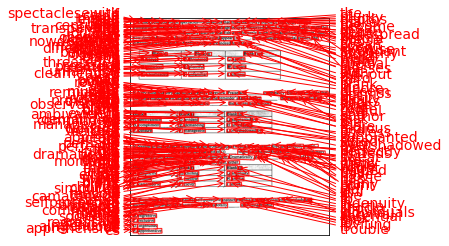

[Google OCR]
Texts:

"7. If one could don magic spectacles-with lenses that make the murky depths of the ocean become
transparent-and look back several centuries to an age before widespread abuse of the ocean began, even the
most (i)
now-depleted species of marine mammals would appear (ii).
differences between past and present oceans are indeed hard to (iii)
observer would quickly discover that fish were formerly much more abundant. Likewise, many
But without such special glasses, the
K Blank (i)
Blank (ii)
Blank (iii)
A. casual
D. threatened
G. ignore
B. prescient
'E. plentiful
H. discern
C. clearheaded
F. unfamiliar
I. dismiss
8. Very good and very bad books are easy to review. Praise and
contain a muddle of virtues and vices? Here the reminder's task is more
come easily. But what of books that
: the author's useful and
thought provoking observations need to be
the useless and tedious.
Blank ii
D. evident
E demanding
F. manageable
Blank iii
G supplanted by
H. sifted from
I. overshado

In [42]:

compare_ocr('test_image.png')

In [62]:
ocr_model_comparison('test_image.png')

Original image:


TypeError: list indices must be integers or slices, not str

[keras-ocr]


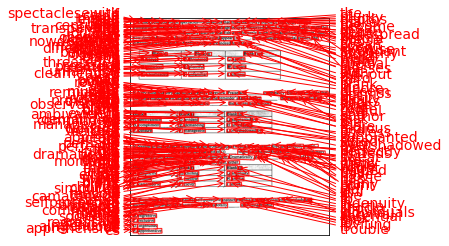

[Google OCR]
Texts:

"Biden Says
LIVE
Ukraine's President Says
He Is 'Target No. 1'
• President Volodymyr Zelensky said 137
Ukrainians had been killed so far, and
disputed Russia's claims of striking only
military targets.
President Biden denounced President
Vladimir Putin for a "brutal assault" on
Ukraine and said the Russian leader wants to
"re-establish the former Soviet Union."
After a battle in the highly radioactive
grounds of the Chernobyl exclusion zone,
Russian forces reportedly seized the power
plant. Here's the latest.
Oh God,
President Volodymyr Zelens
"Putin began a war against U
to destroy our country, and e
strength of the Ukrainian pec
In a televised address, President
Vladimir Putin announced the
Analysis: Beyond Ukraine, the
real target is what Russia's
leader calls America's "empire
G.O.P
invasi
forme
invasion of Ukraine. Here's a
close look at what he said.
of lies."
praise
Putin.
3 Former Officers Are Convicted of
Violating George Floyd's Civil
Rights
The former of

In [50]:
compare_ocr('e1.png')

# Step4. 결과 분석과 결론 제시

- tesseract는 정확도를 논하기에 민망할 정도로 거의 대부분 단어들을 인식하지 못하였고, 심지어 가끔씩은 단어가 있는 부분의 frame조차 제대로 잡아주지 못해 SystemError: tile cannot extend outside image가 뜬다. tesseract는 아직 상용화와 거리가 많이 멀어보인다.

-전반적으로 구글 OCR이 띄어쓰기도 가장 잘 잡아내고 대소문자까지 구분한다는 점에서 나머지 둘 OCR에 비해 성능이 좋다는 것을 알 수 있다. 그 뿐만 아니라, 대체적으로 정확하게 글씨를 잡아냈다. 다만, 3차원으로 기울어진 문자를 인식하는 데에는 다소 취약하다는 아쉬움이 있다. 또한 세로로 된 글자는 아예 인식 못한다는 점도 흠이 될 수 있다. 다행히, 대부분의 음식점 간판의 글씨들은 가로로 글자가 써있다는 점을 감안하면, 구글 OCR은 음식점 간판을 읽는 데에 상당히 적합하다.